## Lottery in a pandemic

In the last post we have seen how to compute and approximate the $m$-th harmonic number, i.e.,
$$
H_m = \sum_{i=1}^m \frac{1}{i}
$$

This number appears in the famous [coupon collection problem](https://en.wikipedia.org/wiki/Coupon_collector%27s_problem). But today let me give you another place where it is useful.

Imaging a place called Path Town which has $10$ residents, which, for some mysterious reasons, has a social network that looks like this

    😀️ -- 😀️ -- 😀️ -- 😀️ -- 😀️ -- 😀️ -- 😀️ -- 😀️ -- 😀️ -- 😀️
    
In other words, person 1 (from the left) knows only person 2, person 2 knows only person 1 and 3,  person 3 only knows person 2 and 4, and so on.
So their social network is just a path of $10$ people.

Now suppose that person 1 sadly contracted corona virus 🤧️. But instead of putting him in isolation, the town decided to do social distancing more "fairly". Every day, among all the people who may still contract the virus through the social network, one is chosen **uniformly at random** through lottery to be put into quarantine. (What is fairer than a lottery?) This goes on until person 🤧️ is also in quarantine.

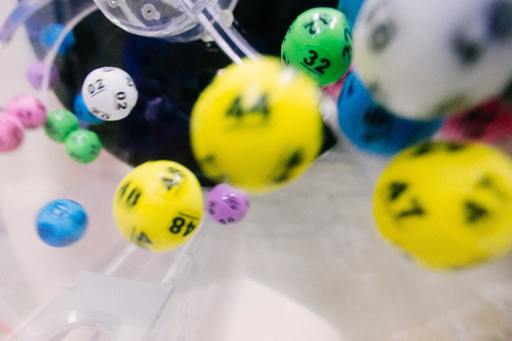
<center>
Photo by dylan nolte on Unsplash
</center>

For example, by the end of day 1, maybe person 6 won the lottery and the network becomes like this

    🤧️️ -- 😀️ -- 😀️ -- 😀️ -- 😀️   😭️  ( 😀️ -- 😀️ -- 😀️ -- 😀️ )
    
Then on day 2, among the 5 people who are still connected to person 1, person 3 got lucky. The network becomes

    🤧️️ -- 😀️    😭️  ( 😀️ -- 😀️ ) 😭️  ( 😀️ -- 😀️ -- 😀️ -- 😀️ )

Finally on day 3, person 1 wons the lottery and he is finally in isolation.

    🤧️️  ( 😀️ )  😭️  ( 😀️ -- 😀️ ) 😭️  ( 😀️ -- 😀️ -- 😀️ -- 😀️ )

Now the question is, on average, how many days does it take, or equivalently, how many people need to be isolated, for person 🤧️️ to go into isolation?

## Lottery by playing cards

Instead of doing a lottery each day, a more efficient but equivalent way to do this is to uniformly randomly shuffle a deck of playing card of $1,.., 10$ and give each person a card.

Then in day one, the person has card with the lowest number is chosen. On day two, the person among the remaining ones with a card of lowest number is chosen. This goes on until eventual until eventual Mr 🤧️️ is chosen.

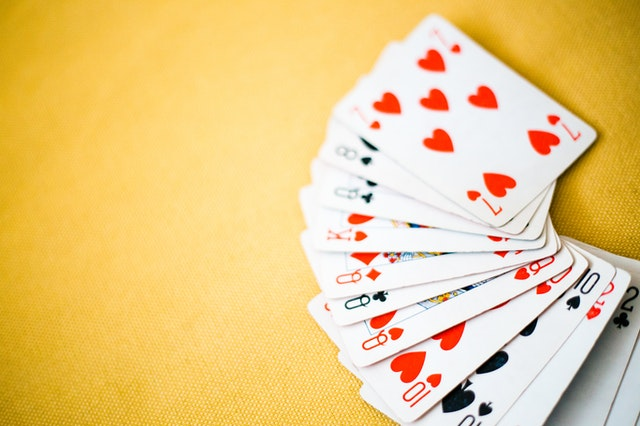

This may sounds surprising 😱️. But think about it for a minute. On the first day, who has better chance to draw the smallest card? 
Everyone has the same change.
On day two, among the remaining ones, who has better chance? No one! Everyone again has the same chance. What happens on day one does not change this fact.

Let's write a Julia function to simulate how this works.

In [1]:
using Random: randperm
function corona_lottery(m)
    X1 = randperm(m)
    X = X1
    while length(X) >= 1
        println(X)
        pos = findmin(X)[2]-1
        X = X[1:pos]
    end
    return X1
end

corona_lottery (generic function with 1 method)

So the lottery may go like this

In [2]:
corona_lottery(10);

[1, 2, 3, 7, 10, 5, 4, 8, 9, 6]


or this

In [3]:
corona_lottery(10);

[10, 5, 4, 1, 2, 6, 3, 7, 8, 9]
[10, 5, 4]
[10, 5]
[10]


## The records

Let's look at an example closer.  (I will seed the random number generator so we will get the same example every time.)

In [4]:
import Random
Random.seed!(1001)
cards = corona_lottery(10);

[8, 9, 4, 6, 1, 10, 5, 3, 2, 7]
[8, 9, 4, 6]
[8, 9]


In this example, the first person goes to isolation is at position $5$. Because he got the card `1` which is smaller than all cards.

The, the second one who won the lottery is at position $3$, because his card `4` is smallest among all the four people who survived 😱️ till day 2.

Then on day three, only two people left and Mr 🤧️ who is at position $1$ won with a card `8`, so the whole process ends.

Stare into this list of numbers a little longer,

    [(((8), 9, 4), 6, 1), 10, 5, 3, 2, 7]
   
you will notice that `8`, `4`, `1` are all smaller than every number before them 🤔️.

Given a list of numbers $X_1, \cdots, X_{10}$, we say that $X_i$ is a **record** it smaller than every number before it.

So it looks like that the number of records in the deck of cards
are the same as the number of people who have to go into isolation.

Let's do another lottery and see if this is still true.

First a function to print out where the records are with red color.

Another lottery

In [5]:
cards1 = corona_lottery(10);

[9, 2, 3, 5, 6, 4, 10, 7, 8, 1]
[9, 2, 3, 5, 6, 4, 10, 7, 8]
[9]


Let's color where the records are

In [6]:
function print_records(X)
    for i in 1:length(X)
        v = X[i]
        if all(X[1:i-1] .> v)
            printstyled("$v  ", color=:red)
        else
            print("$v  ")
        end
    end
end

print_records (generic function with 1 method)

In [7]:
print_records(cards1)

9  2  3  5  6  4  10  7  8  1  

You can run this as many times you want. The number of isolation is always the same as the number of records. This is because if you get a record card, no one on your left you will be isolated before you. So you are guaranteed to go to self-isolation 😭️.

## Back to harmonic number

So what is the chance that the person at position $1$, i.e., Mr 🤧️ being a record? Well, he will always be one.

What is the chance of the person at position $2$ to be a record? Well, since he is only competing with one person, he has $1/2$ of chance to win. So on average, he contributes $1/2$ records.

By this argument, the person at position $i$ contributes on average $1/i$ records. Adding this up, and we have our old friend 😍️, the harmonic number
$$
H_m = \sum_{i=1}^m \frac{1}{m}.
$$
So on average there are $H_m$ records among a uniform random permutations of $m$ people. In terms of pandemic, there are on average $H_m$ people of the Path Town have to go into isolation.

## Simulation with Julia

In case I have not convinced you that harmonic number is the right answer. Let's do some simulation.

In [8]:
function corona_lottery_winner_num(m)
    winner = 0
    X1 = randperm(m)
    X = X1
    while length(X) >= 1
        # println(X)
        pos = findmin(X)[2]-1
        X = X[1:pos]
        winner += 1
    end
    return winner
end

corona_lottery_winner_num (generic function with 1 method)

Let run the lotter for $10$ people $10000$ times.

In [9]:
lottery_data = map(i->corona_lottery_winner_num(10), 1:10^4);

And the average is

In [10]:
using Statistics

In [11]:
mean_isolation = mean(lottery_data)

2.9275

While the $H_{10}$ is

In [12]:
harmonic(m) = sum(i->1/i, 1:m);

In [13]:
h10 = harmonic(10)

2.9289682539682538

And the difference is

In [14]:
h10 - mean_isolation

0.0014682539682535634

Do you believe me now?   😀️